<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [214]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [215]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [216]:
import warnings
warnings.filterwarnings("ignore")
data_aux = data.fillna({"species" : "default"})
contador = 0
lista = []
lista1 = data_aux["species"]
for i in data_aux["species"]:
    if("virginica" in i.lower()):
        lista1[contador] = "virginica"
    elif("versicolor" in i.lower()):
        lista1[contador] = "versicolor"
    elif("setosa" in i.lower()):
        lista1[contador] = "setosa"
    if(lista1[contador] not in lista):
        lista.append(lista1[contador])
    contador += 1
print("elementos de la columna especie: ", contador)

elementos de la columna especie:  150


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

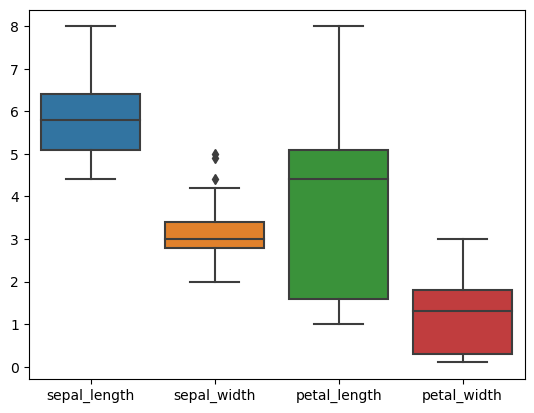

In [217]:
columnas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data_aux2 = pd.DataFrame()
data_aux2["species"] = lista1
for i in columnas:
    data_aux2[i] = data_aux[i]
    data_aux2.fillna({i:0})
data_aux2.head()
sns.boxplot(data=data_aux2)


3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [218]:
lista = []
for i in range(0, contador):
    lista.append("dentro del rango")

for i in columnas:
    cont = 0
    Q1 = data_aux2[i].quantile(0.25)
    Q3 = data_aux2[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for j in data_aux2[i]:
        if(j <= lower_bound or j >= upper_bound):
            lista[cont] = "fuera de rango"
        cont += 1
data_aux2["label"] = lista
data_aux2.head()

,species,sepal_length,sepal_width,petal_length,petal_width,label
0,setosa,4.4,3.2,1.3,3.0,dentro del rango
1,virginica,7.2,3.6,6.1,2.5,dentro del rango
2,virginica,6.3,3.3,6.0,2.5,dentro del rango
3,virginica,6.7,3.3,5.7,2.5,dentro del rango
4,virginica,6.3,3.4,5.6,2.4,dentro del rango


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

Text(0, 0.5, 'petal_length')

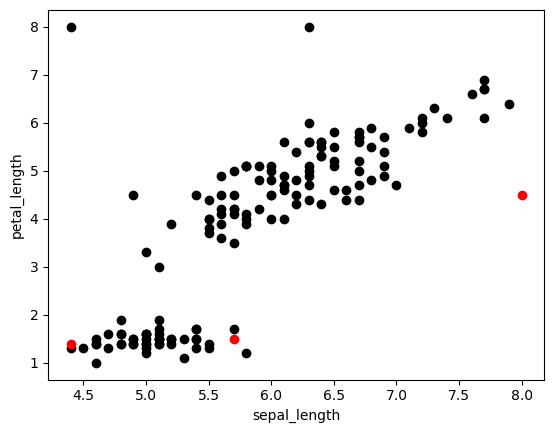

In [219]:
plt.scatter(data_aux2[data_aux2["label"] == "dentro del rango"]["sepal_length"],data_aux2[data_aux2["label"] == "dentro del rango"]["petal_length"], label = "dentro del rango", color = "black")
plt.scatter(data_aux2[data_aux2["label"] == "fuera de rango"]["sepal_length"], data_aux2[data_aux2["label"] == "fuera de rango"]["petal_length"], label= "fuera de rango", color="red")
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

Text(0, 0.5, 'petal_width')

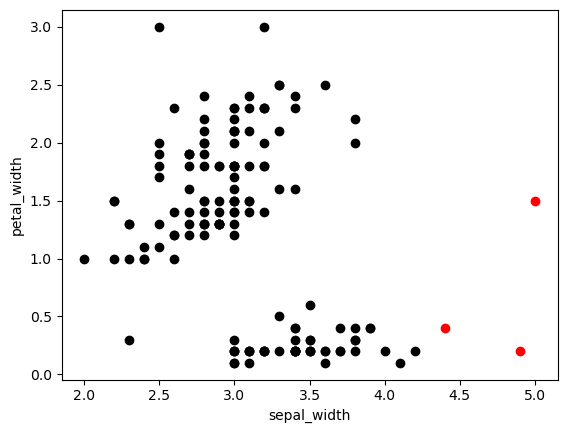

In [220]:
plt.scatter(data_aux2[data_aux2["label"] == "dentro del rango"]["sepal_width"],data_aux2[data_aux2["label"] == "dentro del rango"]["petal_width"], label = "dentro del rango", color = "black")
plt.scatter(data_aux2[data_aux2["label"] == "fuera de rango"]["sepal_width"], data_aux2[data_aux2["label"] == "fuera de rango"]["petal_width"], label= "fuera de rango", color="red")
plt.xlabel('sepal_width')
plt.ylabel('petal_width')

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

Text(0, 0.5, 'petal_length')

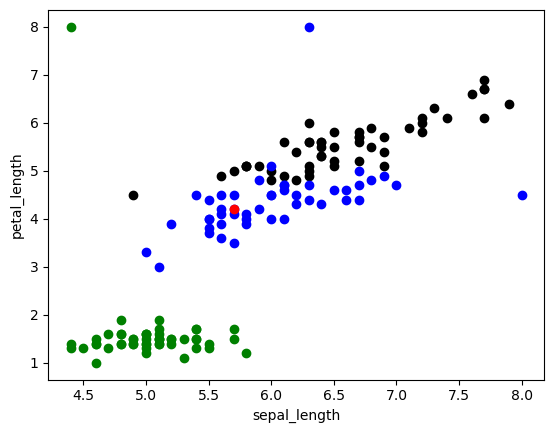

In [221]:
plt.scatter(data_aux2[data_aux2["species"] == "virginica"]["sepal_length"],data_aux2[data_aux2["species"] == "virginica"]["petal_length"], label = "virginica", color = "black")
plt.scatter(data_aux2[data_aux2["species"] == "setosa"]["sepal_length"],data_aux2[data_aux2["species"] == "setosa"]["petal_length"], label = "setosa", color = "green")
plt.scatter(data_aux2[data_aux2["species"] == "versicolor"]["sepal_length"],data_aux2[data_aux2["species"] == "versicolor"]["petal_length"], label = "versicolor", color = "blue")
plt.scatter(data_aux2[data_aux2["species"] == "default"]["sepal_length"],data_aux2[data_aux2["species"] == "default"]["petal_length"], label = "default", color = "red")
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

Text(0, 0.5, 'petal_width')

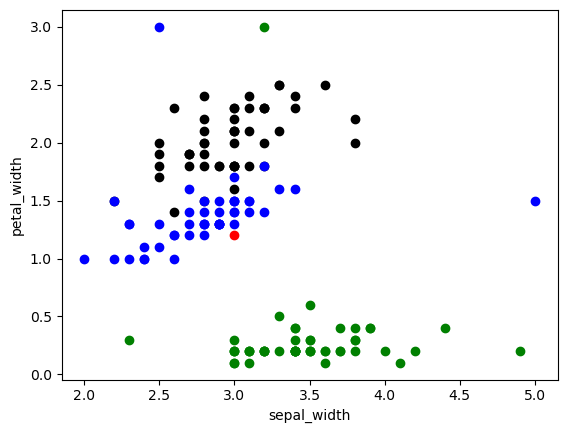

In [222]:
plt.scatter(data_aux2[data_aux2["species"] == "virginica"]["sepal_width"],data_aux2[data_aux2["species"] == "virginica"]["petal_width"], label = "virginica", color = "black")
plt.scatter(data_aux2[data_aux2["species"] == "setosa"]["sepal_width"],data_aux2[data_aux2["species"] == "setosa"]["petal_width"], label = "setosa", color = "green")
plt.scatter(data_aux2[data_aux2["species"] == "versicolor"]["sepal_width"],data_aux2[data_aux2["species"] == "versicolor"]["petal_width"], label = "versicolor", color = "blue")
plt.scatter(data_aux2[data_aux2["species"] == "default"]["sepal_width"],data_aux2[data_aux2["species"] == "default"]["petal_width"], label = "default", color = "red")
plt.xlabel('sepal_width')
plt.ylabel('petal_width')